In [48]:
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
from sklearn.model_selection import train_test_split


## Imports

In [50]:
### Pickled data
import pickle
cleaned_data = pd.read_pickle(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\processed\cleaned_data_Maor.pkl")
X_train = pd.read_pickle(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\processed\X_train.pkl")
X_test = pd.read_pickle(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\processed\X_test.pkl")
y_train = pd.read_pickle(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\processed\y_train.pkl")
y_test = pd.read_pickle(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\processed\y_test.pkl")


X_val_fold_0 = pd.read_pickle(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\processed\X_val_fold_0.pkl")
y_val_fold_0 = pd.read_pickle(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\processed\y_val_fold_0.pkl")
X_val_fold_1 = pd.read_pickle(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\processed\X_val_fold_1.pkl")
y_val_fold_1 = pd.read_pickle(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\processed\y_val_fold_1.pkl")
X_val_fold_2 = pd.read_pickle(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\processed\X_val_fold_2.pkl")
y_val_fold_2 = pd.read_pickle(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\processed\y_val_fold_2.pkl")
X_val_fold_3 = pd.read_pickle(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\processed\X_val_fold_3.pkl")
y_val_fold_3 = pd.read_pickle(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\processed\y_val_fold_3.pkl")
X_val_fold_4 = pd.read_pickle(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\processed\X_val_fold_4.pkl")
y_val_fold_4 = pd.read_pickle(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\processed\y_val_fold_4.pkl")
f1_list = pd.read_pickle(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\Predictions\f1_list.pkl")
prauc_list = pd.read_pickle(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\Predictions\pr_auc_list.pkl")
selected_features_list = pd.read_pickle(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\Predictions\selected_features_list.pkl")

predictions_1st = pd.read_csv(r'C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\Predictions\predictionscatboost.csv',
                                header=None)



In [14]:
y_val = pd.concat([y_val_fold_0, y_val_fold_1, y_val_fold_2, y_val_fold_3, y_val_fold_4], axis=0)
X_val = pd.concat([X_val_fold_0, X_val_fold_1, X_val_fold_2, X_val_fold_3, X_val_fold_4], axis=0)

In [9]:
X_test.isna().sum().sum()

0

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365349 entries, 0 to 370631
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   product                      365349 non-null  category
 1   campaign_id                  365349 non-null  category
 2   webpage_id                   365349 non-null  category
 3   user_group_id                365349 non-null  category
 4   gender                       365349 non-null  category
 5   age_level                    365349 non-null  float64 
 6   user_depth                   365349 non-null  float64 
 7   city_development_index       365349 non-null  float64 
 8   var_1                        365349 non-null  float64 
 9   product_category             365349 non-null  category
 10  user_id_ctrS                 365349 non-null  float64 
 11  product_ctrS                 365349 non-null  float64 
 12  campaign_id_ctrS             365349 non-null  flo

In [64]:
raw_test = pd.read_csv(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\raw\X_test_1st.csv")

In [55]:
n_features_list = np.arange(10,42,1)
metrics_df = pd.DataFrame({'n_features': n_features_list,'pr_auc': prauc_list, 'f1': f1_list})
metrics_df.sort_values('pr_auc', ascending=False)

,n_features,pr_auc,f1
4,14,0.323446,0.153799
14,24,0.207003,0.146290
7,17,0.185699,0.148198
26,36,0.110745,0.160976
25,35,0.110649,0.161165
29,39,0.110646,0.161148
27,37,0.110636,0.160619
31,41,0.110629,0.160410
19,29,0.110618,0.160382
22,32,0.110612,0.161079


In [56]:
# in this nested list find the most common features
from collections import Counter
import pandas as pd

selected_features_list

feature_counts = Counter(feature for feature_set in selected_features_list for feature in feature_set)

# Convert to DataFrame for easy sorting and display
feature_df = pd.DataFrame(feature_counts.items(), columns=['Feature', 'Count'])
feature_df = feature_df.sort_values(by='Count', ascending=False)

# Display the table
print(feature_df)

                               Feature  Count
0                     product_category     32
1                         user_id_ctrS     32
2                      webpage_id_ctrS     32
3                           user_id_te     32
4                       campaign_id_te     32
5                        webpage_id_te     32
6                   user_session_order     32
7                     is_first_session     32
8             hours_since_last_session     32
9              campaign_duration_hours     32
10                          product_te     31
11                    campaign_id_ctrS     30
12                             product     29
13         user_num_of_days_in_webpage     28
14                        product_ctrS     27
15            campaign_num_of_products     26
16                                Hour     25
17                 product_category_te     24
18               product_category_ctrS     23
19  campaign_num_of_product_categories     22
20                  user_group_id_

In [71]:
# Load CatBoost model from folder
from catboost import CatBoostClassifier

# Load the pre-trained model
model = CatBoostClassifier()
model.load_model(r'C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\models\best_model_catboost.cbm')

# Define the selected features
selected_features = [
    'product', 'campaign_id', 'webpage_id', 'user_group_id', 'age_level', 'city_development_index', 'product_category',
    'user_id_ctrS', 'product_ctrS', 'campaign_id_ctrS', 'webpage_id_ctrS', 'user_group_id_ctrS', 'product_category_ctrS',
    'user_id_te', 'product_te', 'campaign_id_te', 'webpage_id_te', 'user_group_id_te', 'product_category_te', 'Hour',
    'Minute', 'weekday', 'user_total_num_of_sessions', 'user_session_order', 'is_first_session', 'user_num_of_days_in_webpage',
    'campaign_num_of_products', 'campaign_num_of_product_categories', 'hours_since_last_session', 'campaign_duration_hours'
]

# Ensure X_train, X_val, y_train, and y_val are defined
# Assuming they are already loaded DataFrames
# X_train = pd.read_pickle('path_to_X_train.pkl')
# X_val = pd.read_pickle('path_to_X_val.pkl')
# y_train = pd.read_pickle('path_to_y_train.pkl')
# y_val = pd.read_pickle('path_to_y_val.pkl')

# Select the features
X_train = X_train[selected_features]
X_val = X_val[selected_features]

# Determine categorical features
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Fit the model
model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False, cat_features=cat_features)

In [72]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test[selected_features])
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.1565


<Axes: xlabel='Importances', ylabel='Feature Id'>

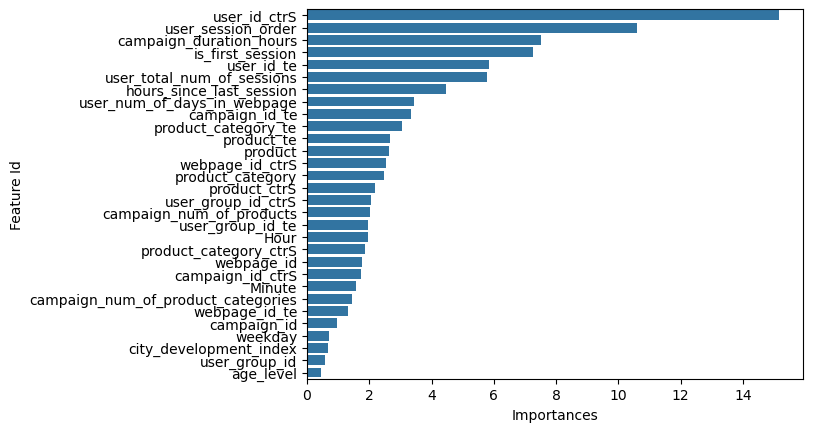

In [78]:
#plot the feature importance
import seaborn as sns
importance = pd.DataFrame(model.get_feature_importance(prettified=True))
sns.barplot(x='Importances', y='Feature Id', data=importance.head(30))

In [56]:
print(type(test['is_click'].to_numpy()))
print(type(y_test.to_numpy().flatten()))
sum(test['is_click'].to_numpy() == y_test.to_numpy().flatten()) == len(y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


True

In [6]:
import pickle

# Load the model from the file
with open(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\processed\y_test_1st.pkl", 'wb') as file:
    pickle.dump(y_test, file)

In [41]:
# Show the mean, max, mode value in each column in an organized way
def show_stats(df):
    stats = pd.DataFrame(index=df.columns, columns=['mean', 'max', 'min','mode'])
    for column in df.columns:
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            stats.loc[column] = [np.nan, np.nan, np.nan, df[column].mode().values[0]]
        else:
            stats.loc[column] = [df[column].mean(), df[column].max(),df[column].min(),  df[column].mode().values[0]]
    return stats

show_stats(X_train)

,mean,max,min,mode
product,NaN,NaN,NaN,C
campaign_id,NaN,NaN,NaN,359520
webpage_id,NaN,NaN,NaN,13787
user_group_id,NaN,NaN,NaN,3
gender,NaN,NaN,NaN,Male
age_level,2.791836,6.0,0.0,3.0
user_depth,2.882903,3.0,1.0,3.0
city_development_index,2.451127,4.0,1.0,2.0
var_1,0.421193,1.0,0.0,0.0
product_category,NaN,NaN,NaN,4


In [42]:
show_stats(X_val_fold_3)

,mean,max,min,mode
product,NaN,NaN,NaN,C
campaign_id,NaN,NaN,NaN,359520
webpage_id,NaN,NaN,NaN,13787
user_group_id,NaN,NaN,NaN,3
gender,NaN,NaN,NaN,Male
age_level,2.799319,6.0,0.0,3.0
user_depth,2.881997,3.0,1.0,3.0
city_development_index,2.449552,4.0,1.0,2.0
var_1,0.424422,1.0,0.0,0.0
product_category,NaN,NaN,NaN,4


In [ ]:
raw_data = pd.read_csv(r"C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\raw\train_dataset_full.csv")


In [62]:
users_train = set(raw_data['user_id'].unique())
users_test = set(raw_test['user_id'].unique())
campaigns_train = set(raw_data['campaign_id'].unique())
campaigns_test = set(raw_test['campaign_id'].unique())
products_train = set(raw_data['product'].unique())
products_test = set(raw_test['product'].unique())
webpage_train = set(raw_data['webpage_id'].unique())
webpage_test = set(raw_test['webpage_id'].unique())
age_level_train = set(raw_data['age_level'].unique())
age_level_test = set(raw_test['age_level'].unique())
user_group_id_train = set(raw_data['user_group_id'].unique())
user_group_id_test = set(raw_test['user_group_id'].unique())
product_category_1_train = set(raw_data['product_category_1'].unique())
product_category_1_test = set(raw_test['product_category_1'].unique())
user_depth_train = set(raw_data['user_depth'].unique())
user_depth_test = set(raw_test['user_depth'].unique())



# Count how many test users are also in train
common_users = users_test.intersection(users_train)
common_campaigns = campaigns_test.intersection(campaigns_train)
common_products = products_test.intersection(products_train)
common_webpage = webpage_test.intersection(webpage_train)
common_age_level = age_level_test.intersection(age_level_train)
common_user_group_id = user_group_id_test.intersection(user_group_id_train)
common_product_category_1 = product_category_1_test.intersection(product_category_1_train)
common_user_depth = user_depth_test.intersection(user_depth_train)


# Compute the percentage
percentage_users_in_train = len(common_users) / len(users_test) * 100
percentage_campaigns_in_train = len(common_campaigns) / len(campaigns_test) * 100
percentage_products_in_train = len(common_products) / len(products_test) * 100
percentage_webpage_in_train = len(common_webpage) / len(webpage_test) * 100
percentage_age_level_in_train = len(common_age_level) / len(age_level_test) * 100
percentage_user_group_id_in_train = len(common_user_group_id) / len(user_group_id_test) * 100
percentage_product_category_1_in_train = len(common_product_category_1) / len(product_category_1_test) * 100
percentage_user_depth_in_train = len(common_user_depth) / len(user_depth_test) * 100


print(f"✅ {percentage_users_in_train:.2f}% of the test users are also in train")
print(f"✅ {percentage_campaigns_in_train:.2f}% of the test campaigns are also in train")
print(f"✅ {percentage_products_in_train:.2f}% of the test products are also in train")
print(f"✅ {percentage_webpage_in_train:.2f}% of the test webpage are also in train")
print(f"✅ {percentage_age_level_in_train:.2f}% of the test age_level are also in train")
print(f"✅ {percentage_user_group_id_in_train:.2f}% of the test user_group_id are also in train")
print(f"✅ {percentage_product_category_1_in_train:.2f}% of the test product_category_1 are also in train")
print(f"✅ {percentage_user_depth_in_train:.2f}% of the test user_depth are also in train")



✅ 74.48% of the test users are also in train
✅ 100.00% of the test campaigns are also in train
✅ 100.00% of the test products are also in train
✅ 100.00% of the test webpage are also in train
✅ 87.50% of the test age_level are also in train
✅ 85.71% of the test user_group_id are also in train
✅ 100.00% of the test product_category_1 are also in train
✅ 66.67% of the test user_depth are also in train


In [79]:
selected_users = [7716.0, 1035283.0, 65994.0,75976.0,987498.0]
cleaned_data[cleaned_data['user_id'] == 980231]

,session_id,DateTime,user_id,product,campaign_id,webpage_id,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,product_category
171888,500379.0,2017-07-03 06:52:00,980231.0,H,405490,60305,5,Male,5.0,3.0,NaN,0.0,0.0,3
200018,95832.0,2017-07-07 19:40:00,980231.0,C,405490,60305,5,Male,5.0,3.0,NaN,0.0,0.0,3


In [77]:
raw_test.head(10)

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1
0,121580,2017-07-03 10:03,352186,H,82320,1734,1,146115.0,2.0,Male,1.0,3.0,4.0,1
1,95831,2017-07-03 14:21,980231,C,405490,60305,3,NaN,6.0,Male,5.0,3.0,NaN,0
2,421806,2017-07-05 17:47,610332,D,404347,53587,1,NaN,3.0,Male,2.0,3.0,1.0,0
3,585403,2017-07-06 11:01,849506,H,118601,28529,5,82527.0,3.0,Male,2.0,3.0,3.0,0
4,496398,2017-07-02 07:50,499495,B,98970,6970,2,NaN,9.0,Female,2.0,3.0,4.0,1
5,340792,2017-07-06 12:05,1138735,H,359520,13787,4,NaN,3.0,Male,2.0,3.0,4.0,0
6,75278,2017-07-07 09:10,470151,C,405490,60305,3,NaN,4.0,Male,3.0,3.0,2.0,0
7,31980,2017-07-05 16:56,538480,E,82320,1734,1,146115.0,3.0,Male,2.0,3.0,3.0,1
8,54082,2017-07-02 15:06,345136,C,405490,60305,3,NaN,2.0,Male,1.0,3.0,NaN,0
9,236163,2017-07-07 08:28,487171,I,118601,28529,4,82527.0,4.0,Male,3.0,3.0,2.0,0


In [63]:
#mean rows of users in train
mean_rows_per_user_train = raw_data.groupby('user_id').size().mean()
mean_rows_per_user_test = raw_test.groupby('user_id').size().mean()
print(f"Mean rows per user in train: {mean_rows_per_user_train:.2f}")
print(f"Mean rows per user in test: {mean_rows_per_user_test:.2f}")

Mean rows per user in train: 2.88
Mean rows per user in test: 1.45


In [56]:
users_train = raw_data['user_id'].unique()
users_test = raw_test['user_id'].unique()
#Check if the users in the test set are a subset of the users in the train set
print(np.all(np.isin(users_test, users_train)))

False


In [10]:
X_test_1st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60228 entries, 0 to 60227
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   product                  60228 non-null  category
 1   campaign_id              60228 non-null  category
 2   webpage_id               60228 non-null  category
 3   user_group_id            60228 non-null  category
 4   gender                   60228 non-null  category
 5   age_level                60228 non-null  float64 
 6   user_depth               60228 non-null  float64 
 7   city_development_index   60228 non-null  float64 
 8   var_1                    60228 non-null  int64   
 9   product_category         60228 non-null  category
 10  Day                      60228 non-null  int32   
 11  Hour                     60228 non-null  int32   
 12  Minute                   60228 non-null  int32   
 13  weekday                  60228 non-null  int32   
 14  campai

In [17]:
#First value should be the header. Strip header and make it first values in first row
predictions_1st

,0
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0
...,...
60223,1.0
60224,0.0
60225,0.0
60226,0.0


In [308]:
y_val_fold_3.value_counts()[0]/y_val_fold_3.value_counts().sum()    

0.9319820664496002

In [47]:
raw_data.isna().sum()

session_id                  4166
DateTime                    4109
user_id                     4108
product                     4174
campaign_id                 4188
webpage_id                  4157
product_category_1          4201
product_category_2        308235
user_group_id              19319
gender                     19324
age_level                  19309
user_depth                 19322
city_development_index    108137
var_1                       4161
is_click                    4132
dtype: int64

In [124]:
# Fill missing values in 'campaign_duration_days' within each campaign_id group using the mode
X_train['age_level'] = X_train.groupby('user_id', observed=True)['campaign_duration_hours'].transform(
    lambda x: x.ffill().bfill() if not x.mode().empty else x.fillna(0)
)

X_test['campaign_duration_hours'] = X_test.groupby('webpage_id', observed=True)['campaign_duration_hours'].transform(
    lambda x: x.ffill().bfill() if not x.mode().empty else x.fillna(0)
)


In [43]:
X_train.isna().sum()

product                    0
campaign_id                0
webpage_id                 0
user_group_id              0
gender                     0
age_level                  0
user_depth                 0
city_development_index     0
var_1                      0
product_category           0
Day                        0
Hour                       0
Minute                     0
weekday                    0
campaign_duration_hours    0
dtype: int64

In [29]:
categorical_cols = X_train.select_dtypes(include=['category', 'object']).columns
X_train2 = X_train.copy()

for col in categorical_cols:
    mode_value = X_train2.loc[X_train2[col] != "missing", col].mode()[0]
    mask = X_train2[col] == "missing"
    X_train2.loc[mask, col] = mode_value

    

In [30]:
X_test2 = X_test.copy()

for col in categorical_cols:
    mode_value = X_test2.loc[X_test2[col] != "missing", col].mode()[0]
    mask = X_test2[col] == "missing"
    X_test2.loc[mask, col] = mode_value


In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, predictions.shape, cleaned_data.shape, raw_data.shape

((293307, 14),
 (73327, 14),
 (293307,),
 (73327,),
 (73160, 1),
 (365798, 14),
 (389163, 15))

In [156]:
X_train.isna().sum()

product                        0
campaign_id                    0
webpage_id                     0
gender                         0
age_level                  11626
user_depth                 11630
city_development_index     79202
var_1                         94
product_category               0
Day                            0
Hour                           0
Minute                         0
weekday                        0
campaign_duration_hours        0
dtype: int64

In [225]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, predictions.shape, cleaned_data.shape, raw_data.shape

((292638, 13),
 (73160, 13),
 (292638,),
 (73160,),
 (73160, 1),
 (365798, 14),
 (389163, 15))

In [506]:
#find how many duplicated rows we have
duplicates = raw_data[raw_data.duplicated()]
duplicates.shape

(19510, 15)

## Feature Engineering

In [ ]:
import pandas as pd
import numpy as np

def feature_generation(df):
    """Generate date/time features and fill missing values in a faster, 
       more scalable way without repeated group-based ffill/bfill.
    """
    df = df.copy()
    
    # If not already a datetime, convert:
    # df['DateTime'] = pd.to_datetime(df['DateTime'])
    
    # -- 1) Create date/time features --
    df['Month'] = df['DateTime'].dt.month
    df['Day'] = df['DateTime'].dt.day
    df['Hour'] = df['DateTime'].dt.hour
    df['Minute'] = df['DateTime'].dt.minute
    df['weekday'] = df['DateTime'].dt.weekday
    
    # -- 2) Drop unnecessary columns --
    df.drop(columns=['DateTime', 'session_id'], inplace=True, errors='ignore')
    
    # -- 3) Make user_id a consistent type --
    # (Strings are often safer keys for merges.)
    df['user_id'] = df['user_id'].astype(str)
    
    # -- 4) Identify columns to fill by median vs. mode --
    #    (You can tune these lists as needed.)
    columns_to_fill_median = ['Month', 'Day', 'Hour', 'Minute', 'weekday']
    columns_to_fill_mode = [
        'product', 'campaign_id', 'webpage_id', 'gender', 
        'age_level', 'user_depth', 'city_development_index', 
        'var_1', 'product_category'
    ]
    
    # Keep only columns that actually exist in df
    columns_to_fill_median = [c for c in columns_to_fill_median if c in df.columns]
    columns_to_fill_mode = [c for c in columns_to_fill_mode if c in df.columns]
    
    # -- 5) Precompute the user-level medians/modes in one pass each --
    if columns_to_fill_median:
        median_df = (
            df.groupby('user_id')[columns_to_fill_median]
            .median()
            .reset_index()
        )
    
    # Mode can be tricky (pandas mode can return multiple values).
    # We'll define a custom aggregator that picks the first mode if multiple modes exist.
    def agg_mode(s):
        m = s.mode(dropna=True)
        return m.iloc[0] if len(m) > 0 else np.nan
        
    if columns_to_fill_mode:
        mode_df = (
            df.groupby('user_id')[columns_to_fill_mode]
            .agg(agg_mode)
            .reset_index()
        )
        
    # -- 6) Merge those statistics back to df --
    # This is usually much more performant than repeated group transforms:
    if columns_to_fill_median:
        df = df.merge(
            median_df, 
            on='user_id', 
            suffixes=('', '_median')
        )
    if columns_to_fill_mode:
        df = df.merge(
            mode_df, 
            on='user_id', 
            suffixes=('', '_mode')
        )
        
    # -- 7) Fill missing values in df using the merged median/mode --
    if columns_to_fill_median:
        for col in columns_to_fill_median:
            df[col] = df[col].fillna(df[f'{col}_median'])
            df.drop(columns=[f'{col}_median'], inplace=True, errors='ignore')
            
    if columns_to_fill_mode:
        for col in columns_to_fill_mode:
            df[col] = df[col].fillna(df[f'{col}_mode'])
            df.drop(columns=[f'{col}_mode'], inplace=True, errors='ignore')
    
    for col in columns_to_fill_median:
        df[col] = df[col].fillna(df[col].median())

    for col in columns_to_fill_mode:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    df.drop(columns=['user_id','user_group_id'], inplace=True, errors='ignore')
            
    return df

# Example usage:
X_train_u = feature_generation(X_train)
X_test_u  = feature_generation(X_test)


Month
Day
Hour
Minute
weekday
product
campaign_id
webpage_id
gender
age_level
user_depth
city_development_index
var_1
product_category
Month
Day
Hour
Minute
weekday
product
campaign_id
webpage_id
gender
age_level
user_depth
city_development_index
var_1
product_category


In [14]:
def fill_missing_with_mode(df: pd.DataFrame, columns: list):
    df = df.copy()
    for column in columns:
        if column in df.columns:
            mode_value = df[column].mode()[0]  # Calculate the mode
            df[column] = df[column].fillna(mode_value)  # Fill missing values with the mode
    return df

def fill_missing_with_median(df: pd.DataFrame, columns: list):
    df = df.copy()
    for column in columns:
        if column in df.columns:
            median_value = df[column].median()  # Calculate the median
            df[column] = df[column].fillna(median_value)  # Fill missing values with the median
    return df   

In [15]:
X_train.columns

Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1', 'product_category'],
      dtype='object')

In [25]:
def fill_missing_with_mode(df: pd.DataFrame, columns: list):
    df = df.copy()
    for column in columns:
        if column in df.columns:
            mode_value = df[column].mode()[0]  # Calculate the mode
            df[column] = df[column].fillna(mode_value)  # Fill missing values with the mode
    return df

def fill_missing_with_median(df: pd.DataFrame, columns: list):
    df = df.copy()
    for column in columns:
        if column in df.columns:
            median_value = df[column].median()  # Calculate the median
            df[column] = df[column].fillna(median_value)  # Fill missing values with the median
    return df

def determine_categorical_features(df: pd.DataFrame, cat_features: list = None):

    if cat_features:
        cat_features = [col for col in cat_features if col in df.columns]
    else:
        cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

    for col in cat_features:
        if col in df.columns:
            # Ensure column is treated as category
            df[col] = df[col].astype("category")

            # Add "missing" only if it's not already a category
            if "missing" not in df[col].cat.categories:
                df[col] = df[col].cat.add_categories("missing")

            # Fill missing values with "missing"
            df[col] = df[col].fillna("missing")

    return cat_features

def feature_generation2(df, use_missing_with_mode=False, get_dumm=False, catb=True, cat_features=None):

    df = df.copy()

    # Generate time-based features
    df['Month'] = df['DateTime'].dt.month
    df['Day'] = df['DateTime'].dt.day
    df['Hour'] = df['DateTime'].dt.hour
    df['Minute'] = df['DateTime'].dt.minute
    df['weekday'] = df['DateTime'].dt.weekday

    # Handle categorical features if `catb` is True
    if catb:
        cat_features = determine_categorical_features(df, cat_features)

    # Fill missing values
    if use_missing_with_mode:
        print("Filling missing values with mode")
        columns_to_fill_mode = ["product", "campaign_id", "webpage_id", "user_group_id", "gender", "age_level", "user_depth", "city_development_index", "var_1", "product_category",
                                "Month", "Day", "Hour"]
        df = fill_missing_with_mode(df, columns_to_fill_mode)

    columns_to_fill_median = ["Month", "Day", "Hour", "Minute", "weekday", "city_development_index", "age_level", "user_depth"]
    df['campaign_id'] = df['campaign_id'].fillna(df['campaign_id'].mode()[0]) #userid and sessionid have nas. What can we do else?
    df['var_1'] = df['var_1'].fillna(df['var_1'].mode()[0])
    df = fill_missing_with_median(df, columns_to_fill_median)

    # Generate campaign-based features
    df['start_date'] = df.groupby('campaign_id', observed=True)['DateTime'].transform('min')
    df['campaign_duration'] = df['DateTime'] - df['start_date']
    df['campaign_duration_days'] = df['campaign_duration'].dt.total_seconds() / (3600*24)
    df['campaign_duration_days'] = df['campaign_duration_days'].fillna(
        df.groupby('campaign_id', observed=True)['campaign_duration_days'].transform(lambda x: x.mode().iloc[0])).astype(int)

    # Drop unnecessary columns
    df.drop(columns=['DateTime', 'start_date', 'campaign_duration', 'session_id', 'user_id', 'user_group_id'], inplace=True)

    # One-hot encoding if `get_dumm` is True
    if get_dumm:
        columns_to_d = ["product", "campaign_id", "webpage_id", "product_category", "gender"]
        df = pd.get_dummies(df, columns=columns_to_d)

    return df


In [26]:
X_train2 = feature_generation2(X_train)
X_test2 = feature_generation2(X_test)
cat_features = determine_categorical_features(X_train2)

KeyError: 'DateTime'

In [31]:
columns_to_d = ["product", "campaign_id", "webpage_id", "product_category", "gender","user_group_id"]
X_train_d = pd.get_dummies(X_train2, columns=columns_to_d)
X_test_d = pd.get_dummies(X_test2, columns=columns_to_d)

In [212]:
X_train2['gender'].value_counts()

gender
Male       248397
Female      32776
missing     11465
Name: count, dtype: int64

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
rf.fit(X_train_d, y_train)
y_pred = rf.predict(X_test_d)

f1_score(y_test, y_pred)

0.040829346092503986

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import f1_score

# Compute sample weights
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)

# Train AdaBoost with sample weights
adamodel = AdaBoostClassifier(n_estimators=100, random_state=42, algorithm='SAMME')
adamodel.fit(X_train_d, y_train, sample_weight=sample_weights)

# Make predictions
y_pred = adamodel.predict(X_test_d)

# Evaluate
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


F1 Score: 0.13929004519898577


In [93]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train2, y_train)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred2 = rf.predict(X_test2)



In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
#adjuct the balance of the classes
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42, solver='liblinear',
                           penalty='l2', C=1)
model.fit(X_train_d, y_train)

y_pred_LR = model.predict(X_test_d)
print(f1_score(y_test, y_pred_LR))

0.14371159806427056


In [49]:
from sklearn.model_selection import cross_val_score
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42, solver='liblinear',
                           penalty='l2', C=1)
#run it on all
scores = cross_val_score(model, X_train_d, y_train, cv=5, scoring='f1')
scores

array([0.14191397, 0.14630052, 0.14374937, 0.1396726 , 0.14359774])

In [50]:
np.mean([0.14191397, 0.14630052, 0.14374937, 0.1396726 , 0.14359774])

0.14304684

In [47]:
#import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB


model1 = ComplementNB()
model2 = GaussianNB()
model3 = MultinomialNB()
model4 = BernoulliNB()   
print("Complement Bayes: ", cross_val_score(model1, X_train_d, y_train, cv=5, scoring='f1'))
print("Gaussian Bayes: ", cross_val_score(model2, X_train_d, y_train, cv=5, scoring='f1'))
print("Multinomial Bayes: ", cross_val_score(model3, X_train_d, y_train, cv=5, scoring='f1'))
print("Bernoulli Bayes: ", cross_val_score(model4, X_train_d, y_train, cv=5, scoring='f1'))

Complement Bayes:  [0.13291654 0.13741399 0.13816756 0.13567328 0.13666374]
Gaussian Bayes:  [0.13584671 0.14390066 0.13671663 0.13889985 0.13384344]
Multinomial Bayes:  [0.00100806 0.         0.         0.         0.        ]
Bernoulli Bayes:  [0. 0. 0. 0. 0.]


In [30]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB

# Compute sample weights
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)

# Define models without random_state
model1 = ComplementNB()
model2 = GaussianNB()
model3 = MultinomialNB()
model4 = BernoulliNB()

# Fit models with sample weights
model1.fit(X_train_d, y_train, sample_weight=sample_weights)
model2.fit(X_train_d, y_train, sample_weight=sample_weights)
model3.fit(X_train_d, y_train, sample_weight=sample_weights)
model4.fit(X_train_d, y_train, sample_weight=sample_weights)

# Cross-validation with sample weights
print("Complement Bayes:", cross_val_score(model1, X_train_d, y_train, cv=5, scoring='f1'))
print("Gaussian Bayes:", cross_val_score(model2, X_train_d, y_train, cv=5, scoring='f1'))
print("Multinomial Bayes:", cross_val_score(model3, X_train_d, y_train, cv=5, scoring='f1'))
print("Bernoulli Bayes:", cross_val_score(model4, X_train_d, y_train, cv=5, scoring='f1'))


Complement Bayes: [0.13285236 0.13694722 0.13831141 0.13642458 0.13636068]
Gaussian Bayes: [0.13413932 0.14055185 0.13428364 0.13605852 0.13060411]
Multinomial Bayes: [0. 0. 0. 0. 0.]
Bernoulli Bayes: [0. 0. 0. 0. 0.]


In [33]:
#import sgdclassifier
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=42, loss='log_loss', class_weight='balanced')
model.fit(X_train_d, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_d)
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")

F1-score: 0.14070554937834834


In [44]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.kernel_approximation import RBFSampler,Nystroem
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Load CTR data (Assume df is the CTR dataset)


# Define the full pipeline
rbf_pipeline = Pipeline([
    ("rbf_feature_map", Nystroem(gamma=1, n_components=300)),  # RBF feature map
    ("sgd", SGDClassifier(random_state=42, loss='log_loss', class_weight='balanced'))  # SGD with log-loss
])

# Split the data


# Train the model
rbf_pipeline.fit(X_train_d, y_train)

# Predict
y_pred_rbf = rbf_pipeline.predict(X_test_d)

# Evaluate
f1_rbf = f1_score(y_test, y_pred_rbf)
print(f"F1-score with RBF SGD: {f1_rbf}")


F1-score with RBF SGD: 0.12733747750277624


**Baseline? :()**

In [163]:
cleaned_data['is_click'].value_counts()[0]/cleaned_data['is_click'].value_counts().sum()

0.9323260378678943

In [6]:
a = 1- cleaned_data['is_click'].value_counts()[0]/cleaned_data['is_click'].value_counts().sum()

In [569]:
X_train1 = X_train.drop(columns=['session_id', 'DateTime', 'user_id'])

In [309]:
import logging
import numpy as np
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

# Configure logger
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def objective(trial):
    # Define hyperparameters to optimize
    params = {
        "iterations": 1000,
        "depth": trial.suggest_int("depth", 4, 8),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 100),
        "grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree", "Depthwise", "Lossguide"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli"]),
        "class_weights": [1, 1 / 0.06767396213210575],  # Fixed class weights
        "eval_metric": "F1",
        "early_stopping_rounds": 100,
        "random_seed": 42,
        "verbose": 0,
    }

    # Add bagging_temperature or subsample based on bootstrap_type
    if params["bootstrap_type"] == "Bayesian":
        params["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0.0, 1.0)
    elif params["bootstrap_type"] == "Bernoulli":
        params["subsample"] = trial.suggest_float("subsample", 0.5, 1.0)

    # Initialize the model
    model = CatBoostClassifier(**params)

    # Cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for fold_index, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
        # Create train-validation splits
        X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Check if both classes are present in the training and validation sets
        if len(np.unique(y_train_cv)) < 2 or len(np.unique(y_val_cv)) < 2:
            logger.warning(f"Fold {fold_index}: Skipping due to only one class in y_train_cv or y_val_cv")
            continue

        # Train the model
        model.fit(
            X_train_cv,
            y_train_cv,
            cat_features=cat_features,
            eval_set=(X_val_cv, y_val_cv),
            early_stopping_rounds=50,
            use_best_model=True
        )

        # Predict on the validation set
        y_pred_val = model.predict(X_val_cv)

        # Calculate F1 score
        try:
            score = f1_score(y_val_cv, y_pred_val)
            scores.append(score)
            logger.info(f"Fold {fold_index}: F1 score = {score}")
        except Exception as e:
            logger.error(f"Error calculating F1 score on fold {fold_index}: {e}")
            continue

    # Return the average F1 score across folds
    if scores:
        return np.mean(scores)
    else:
        logger.warning("All folds were skipped. Returning 0.0.")
        return 0.0

In [ ]:
def objective(trial):
    params = {
        "iterations": 1000,
        "depth": trial.suggest_int("depth", 3, 5),
        "learning_rate": trial.suggest_float("learning_rate", 0.08, 0.15),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 15, 40),
        "random_strength": trial.suggest_float("random_strength", 0.1, 1.5),
        #"bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree", "Depthwise"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        #"class_weights": [1, 1 / trial.suggest_float("class_weight_ratio", 1.0, 10.0)],
        "eval_metric": "F1",
        "class_weights": [1, 1 / 0.06767396213210575],
        "early_stopping_rounds": 100,
        "random_seed": 42,
        "verbose": 0,
    }

    if params["bootstrap_type"] == "Bayesian":
        params["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0.1, 0.8)
    if params['grow_policy'] == 'Depthwise':
        params['min_data_in_leaf'] = trial.suggest_int("min_data_in_leaf", 1, 10)
    elif params["bootstrap_type"] == "Bernoulli":
        params["subsample"] = trial.suggest_float("subsample", 0.6, .9)

    model = CatBoostClassifier(**params)

    X_train, X_val, y_train, y_val = train_test_split(
        X_train,
        y_train,
        test_size=0.2,
        random_state=42,
        stratify=y_train
    )

    model.fit(
        X_train,
        y_train,
        cat_features=cat_features,
        eval_set=(X_val, y_val),
        early_stopping_rounds=50,
        use_best_model=True
    )

    y_pred_val = model.predict(X_val)
    f1 = f1_score(y_val, y_pred_val)
    return f1





In [ ]:
# Create study that aims to maximize F1
import optuna
study = optuna.create_study(direction="maximize")

# Optimize over 'objective' for a certain number of trials
study.optimize(objective, n_trials=100, show_progress_bar=True)


In [245]:
params2 = study.best_params

In [236]:
params2

{'depth': 4,
 'learning_rate': 0.12751986192358583,
 'l2_leaf_reg': 28.56605893525792,
 'random_strength': 1.4329403288787461,
 'grow_policy': 'SymmetricTree',
 'bootstrap_type': 'Bayesian',
 'bagging_temperature': 0.31033906089109137}

In [192]:
params =  study.best_params

In [193]:
params

{'depth': 4,
 'learning_rate': 0.1264579533008154,
 'l2_leaf_reg': 30.03825012048619,
 'grow_policy': 'SymmetricTree',
 'subsample': 0.7558041984536977}

In [238]:
completed_trials = [trial for trial in study.trials if trial.state == optuna.trial.TrialState.COMPLETE]

# Sort the trials by the value (objective) in descending order (maximize performance)
sorted_trials = sorted(completed_trials, key=lambda trial: trial.value, reverse=True)

# Extract the top 5 parameter sets
top_5_params = [trial.params for trial in sorted_trials[:5]]

In [239]:
top_5_params

[{'depth': 4,
  'learning_rate': 0.12751986192358583,
  'l2_leaf_reg': 28.56605893525792,
  'random_strength': 1.4329403288787461,
  'grow_policy': 'SymmetricTree',
  'bootstrap_type': 'Bayesian',
  'bagging_temperature': 0.31033906089109137},
 {'depth': 4,
  'learning_rate': 0.1248507739152174,
  'l2_leaf_reg': 24.826390939702126,
  'random_strength': 1.4094504738081457,
  'grow_policy': 'SymmetricTree',
  'bootstrap_type': 'Bayesian',
  'bagging_temperature': 0.3773129429403069},
 {'depth': 4,
  'learning_rate': 0.10889824051169908,
  'l2_leaf_reg': 24.326419520439615,
  'random_strength': 1.4322494067371123,
  'grow_policy': 'SymmetricTree',
  'bootstrap_type': 'Bayesian',
  'bagging_temperature': 0.481893039827185},
 {'depth': 4,
  'learning_rate': 0.1178823321005181,
  'l2_leaf_reg': 22.111997922334616,
  'random_strength': 1.428924662511862,
  'grow_policy': 'SymmetricTree',
  'bootstrap_type': 'Bayesian',
  'bagging_temperature': 0.4705315566363708},
 {'depth': 4,
  'learning_ra

In [12]:
# Import necessary libraries
import pandas as pd
import logging
from pathlib import Path
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold

# Define the ModelTrainer class
class ModelTrainer:
    def __init__(self, data_dir: False, model_name: str = "catboost", cat_features: list = None):
        #self.data_dir = Path(data_dir)
        self.model_name = model_name
        self.cat_features = cat_features

        logging.basicConfig(level=logging.INFO)
        self.logger = logging.getLogger(__name__)

    def load_data(self):
        self.logger.info(f"Loading preprocessed data from {self.data_dir}...")
        X_train = pd.read_pickle(self.data_dir / "X_train.pkl")
        y_train = pd.read_pickle(self.data_dir / "y_train.pkl").squeeze()
        return X_train, y_train

    def determine_categorical_features(self, X_train: pd.DataFrame):
        if self.cat_features:
            cat_features = [col for col in self.cat_features if col in X_train.columns]
        else:
            cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

        self.logger.info(f"Categorical features: {cat_features}")
        return cat_features


    def cross_validate_model(self, X_train: pd.DataFrame, y_train: pd.Series, cat_features: list, cv: int = 5):
        if self.model_name == 'catboost':
            model = CatBoostClassifier(
                random_seed=42, verbose=0, eval_metric='F1',
                cat_features=cat_features, class_weights=[1, 10]
            )
        else:
            raise ValueError(f"Unsupported model: {self.model_name}")

        self.logger.info(f"Performing {cv}-fold cross-validation...")
        skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

        fold_scores = []
        for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
            self.logger.info(f"Processing fold {fold + 1}...")

            X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            self.logger.info(f"Validation set shape for fold {fold + 1}: {X_fold_val.shape}")

            model.fit(X_fold_train, y_fold_train, eval_set=(X_fold_val, y_fold_val), use_best_model=True)

            fold_score = model.best_score_['validation']['F1']
            fold_scores.append(fold_score)

            self.logger.info(f"Fold {fold + 1} F1 score: {fold_score}")

        mean_cv_score = sum(fold_scores) / len(fold_scores)
        self.logger.info(f"Mean cross-validation F1 score: {mean_cv_score}")
        return mean_cv_score

    def train_model(self, X_train: pd.DataFrame, y_train: pd.Series, cat_features: list, val_size: float = 0.2):
        if self.model_name == 'catboost':
            model = CatBoostClassifier(
            random_seed=42,
            verbose=100,
            eval_metric='F1',
            loss_function='Logloss',
            cat_features=cat_features,
           #auto_class_weights='Balanced',
            #bootstrap_type= "Bernoulli",
            #grow_policy= "SymmetricTree",
            class_weights=[1, 1 / a],
            early_stopping_rounds=100,
            **params2
            )

        else:
            raise ValueError(f"Unsupported model: {self.model_name}")

        self.logger.info(f"Training {self.model_name} model...")
        X_train.drop(columns=['session_id', 'DateTime', 'user_id'], inplace=True, errors='ignore')

        X_train_final, X_valid, y_train_final, y_valid = train_test_split(
            X_train, y_train, test_size=val_size, random_state=42)
        

        self.logger.info(f"Training {self.model_name} model with validation set...")
        model.fit(X_train_final, y_train_final, eval_set=(X_valid, y_valid), use_best_model=True)

        return model

# Interactive Workflow for Jupyter Notebook
# Define the data directory
DATA_DIR = "path/to/data"  # Replace with your actual path

# Initialize ModelTrainer
trainer = ModelTrainer(DATA_DIR,model_name="catboost")
cat_features = trainer.determine_categorical_features(X_train)



INFO:__main__:Categorical features: ['product', 'campaign_id', 'webpage_id', 'user_group_id', 'gender', 'product_category', 'part_of_day']


In [51]:
trainer = ModelTrainer(DATA_DIR, model_name="catboost")
trainer.determine_categorical_features(X_train)

INFO:__main__:Categorical features: ['product', 'campaign_id', 'webpage_id', 'user_group_id', 'gender', 'product_category']


['product',
 'campaign_id',
 'webpage_id',
 'user_group_id',
 'gender',
 'product_category']

In [16]:
X_train.shape

(365349, 44)

In [ ]:
from sklearn.metrics import f1_score, precision_recall_curve, auc
sample_params = {'depth': 4,
  'learning_rate': 0.12751986192358583,
  'l2_leaf_reg': 28.56605893525792,
  'random_strength': 1.4329403288787461,
  'grow_policy': 'SymmetricTree',
  'bootstrap_type': 'Bayesian',
  'bagging_temperature': 0.31033906089109137}



pr_auc_list = []
f1_list = []
selected_features_list = []
n_features_list = [5] + list(np.arange(10, 43, 1))

# Get categorical features ONCE before the loop
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Initialize the first model with categorical features
model = CatBoostClassifier(
    **sample_params,
    random_seed=42,
    verbose=0,
    eval_metric='PRAUC:type=Classic',
    cat_features=cat_features,  # Initial categorical features
    auto_class_weights='Balanced'
)

# Now perform feature selection
for k in n_features_list:
    # Use column indices for feature selection
    selected_features = model.select_features(
        X=X_train,
        y=y_train,
        eval_set=(X_val, y_val),
        num_features_to_select=k,
        train_final_model=False,
        features_for_select=list(range(X_train.shape[1])),
        algorithm="RecursiveByPredictionValuesChange",
        logging_level="Verbose",
        plot=False
    )
    
    # Get selected feature names
    selected_feature_names = selected_features['selected_features_names']
    selected_features_list.append(selected_feature_names)
    X_train_new = X_train[selected_feature_names]
    X_val_new = X_val[selected_feature_names]
    
    # Update categorical features based on selected features
    new_cat_features = [col for col in cat_features if col in selected_feature_names]
    
    # Create new model with updated categorical features
    model_new = CatBoostClassifier(
        **sample_params,
        random_seed=42,
        verbose=0,
        eval_metric='PRAUC:type=Classic',
        cat_features=new_cat_features,
        auto_class_weights='Balanced'
    )
    
    # Fit and evaluate
    model_new.fit(X_train_new, y_train, eval_set=(X_val_new, y_val), use_best_model=True)
    y_pred = model_new.predict(X_val_new)
    f1 = f1_score(y_val, y_pred)
    pr, rc, _ = precision_recall_curve(y_val, model_new.predict_proba(X_val_new)[:, 1])
    pr_auc = auc(rc, pr)
    
    pr_auc_list.append(pr_auc)
    f1_list.append(f1)





Step #1 out of 1

bestTest = 0.6348964856
bestIteration = 998

Shrink model to first 999 iterations.
Feature #3 eliminated
Feature #4 eliminated
Feature #6 eliminated
Feature #35 eliminated
Feature #5 eliminated
Feature #8 eliminated
Feature #1 eliminated
Feature #15 eliminated
Feature #17 eliminated
Feature #30 eliminated
Feature #19 eliminated
Feature #28 eliminated
Feature #29 eliminated
Feature #26 eliminated
Feature #24 eliminated
Feature #18 eliminated
Feature #39 eliminated
Feature #36 eliminated
Feature #40 eliminated
Feature #9 eliminated
Feature #14 eliminated
Feature #16 eliminated
Feature #27 eliminated
Feature #34 eliminated
Feature #41 eliminated
Feature #13 eliminated
Feature #31 eliminated
Feature #12 eliminated
Feature #0 eliminated
Feature #37 eliminated
Feature #7 eliminated
Feature #20 eliminated
Feature #2 eliminated
Feature #38 eliminated
Feature #22 eliminated
Feature #23 eliminated
Feature #25 eliminated
Feature #11 eliminated
Feature #32 eliminated
Train final 

FileNotFoundError: [Errno 2] No such file or directory: 'data\\Predictions\\selected_features_list.pkl'

In [52]:
import pickle
# save the features list to disk
with open(r'C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\Predictions\selected_features_list.pkl', 'wb') as f:
    pickle.dump(selected_features_list, f)

with open(r'C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\Predictions\pr_auc_list.pkl', 'wb') as f:
    pickle.dump(pr_auc_list, f)
with open(r'C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\Predictions\f1_list.pkl', 'wb') as f:
    pickle.dump(f1_list, f)

In [53]:
metrics_df = pd.DataFrame({'n_features': n_features_list,'pr_auc': pr_auc_list, 'f1': f1_list})
metrics_df.sort_values('f1', ascending=False)

ValueError: All arrays must be of the same length

In [33]:
# in this nested list find the most common features
from collections import Counter
import pandas as pd

selected_features_list

feature_counts = Counter(feature for feature_set in selected_features_list for feature in feature_set)

# Convert to DataFrame for easy sorting and display
feature_df = pd.DataFrame(feature_counts.items(), columns=['Feature', 'Count'])
feature_df = feature_df.sort_values(by='Count', ascending=False)

# Display the table
print(feature_df)

                               Feature  Count
0                         user_id_ctrS     34
1                           user_id_te     34
2                               Minute     34
3             hours_since_last_session     34
4              campaign_duration_hours     34
5                         product_ctrS     33
6                           product_te     33
7                       campaign_id_te     33
8                     user_group_id_te     33
9                                 Hour     33
10                    is_first_session     32
11                          webpage_id     31
12               product_category_ctrS     30
13              city_development_index     29
14                  user_session_order     28
15                             product     27
16                    campaign_id_ctrS     26
17                 product_category_te     25
18                     webpage_id_ctrS     24
19  campaign_num_of_product_categories     23
20                             wee

In [33]:
selected_features['selected_features_names']

['user_id_ctrS', 'campaign_id_ctrS']

array([0.44919323, 0.44768731, 0.44003129, ..., 0.52269697, 0.66373564,
       0.55594396])

In [ ]:
a = 1- cleaned_data['is_click'].value_counts()[0]/cleaned_data['is_click'].value_counts().sum()
model.fit(X_train[selected_features['selected_features_names']], 
          y_train, eval_set=(X_val[selected_features['selected_features_names']], y_val), use_best_model=True)



ValueError: 'product' is not in list

In [248]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9472    0.5222    0.6732     68404
         1.0     0.0823    0.5954    0.1446      4923

    accuracy                         0.5271     73327
   macro avg     0.5147    0.5588    0.4089     73327
weighted avg     0.8891    0.5271    0.6377     73327



In [249]:
import numpy as np
from sklearn.metrics import f1_score

# After training your CatBoost model:
y_probs = model.predict_proba(X_test)[:, 1]

best_threshold = 0.0
best_f1 = 0.0

# We can search thresholds from 0.0 to 1.0 in small steps
for t in np.linspace(0, 1, 101):
    y_pred = (y_probs >= t).astype(int)
    score = f1_score(y_test, y_pred)
    if score > best_f1:
        best_f1 = score
        best_threshold = t

print(f"Best threshold: {best_threshold}")
print(f"Best F1 score: {best_f1}")

# When predicting on test data, use the best_threshold:
y_probs_test = model.predict_proba(X_test)[:, 1]
y_pred_test = (y_probs_test >= best_threshold).astype(int)


Best threshold: 0.5700000000000001
Best F1 score: 0.15008745080891997


In [36]:
y_test

0        0
1        0
2        0
3        0
4        0
        ..
60223    0
60224    0
60225    0
60226    1
60227    0
Name: is_click, Length: 60228, dtype: int64

In [46]:
from sklearn.metrics import f1_score, precision_recall_curve, auc
y_proba = model_new.predict_proba(X_val_new)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_val, y_proba)
pr_auc = auc(recall, precision)
pr_auc

0.11802494861092991

## Naive preprocessing (not my class)

In [19]:
data2= raw_data.drop(columns = ['session_id', 'DateTime', 'user_id','product_category_2'])
data2.dropna(inplace = True) # Just close your eyes and drop the rows with missing values
data2.drop_duplicates(inplace = True) # Drop duplicates

In [23]:
data2.shape

(11879, 11)

In [20]:
X_2 = data2.drop(columns = ['is_click'])
y_2 = data2['is_click']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

***

# `Error Analysis`

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

In [94]:
error_analysis_df = pd.read_csv(r'C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\Predictions\error_analysis.csv')
y_test = pd.read_pickle(r'C:\Users\maorb\Classes\Classical_ML\YDATA-kaggle-assignment\data\processed\y_test.pkl')

In [91]:
y_test.value_counts()   

is_click
0    56153
1     4075
Name: count, dtype: int64

In [92]:
error_analysis_df['brier_score'].value_counts()

brier_score
0.230271    60228
Name: count, dtype: int64

In [95]:
error_analysis_df.head()

,product,campaign_id,webpage_id,user_group_id,gender,age_level,user_depth,city_development_index,var_1,product_category,...,campaign_num_of_product_categories,hours_since_last_session,campaign_duration_hours,entropy,brier_score,calibration_error,label,prediction,is_click_proba_0,is_click_proba_1
0,H,82320,1734,1.0,Male,1.0,3.0,4.0,1,1,...,2,0.000000,32.383333,0.649087,0.419030,0.647325,0,1.0,0.352675,0.647325
1,C,405490,60305,5.0,Male,5.0,3.0,2.0,0,3,...,4,0.000000,38.333333,0.633761,0.449690,0.670589,0,1.0,0.329411,0.670589
2,D,404347,53587,2.0,Male,2.0,3.0,1.0,0,1,...,2,56.833333,89.616667,0.691929,0.225933,0.475325,0,0.0,0.524675,0.475325
3,H,118601,28529,2.0,Male,2.0,3.0,3.0,0,5,...,3,0.000000,30.433333,0.692969,0.240638,0.490549,0,0.0,0.509451,0.490549
4,B,98970,6970,8.0,Female,2.0,2.0,4.0,1,2,...,5,0.000000,6.500000,0.539862,0.053124,0.230485,0,0.0,0.769515,0.230485


<Axes: xlabel='entropy', ylabel='Count'>

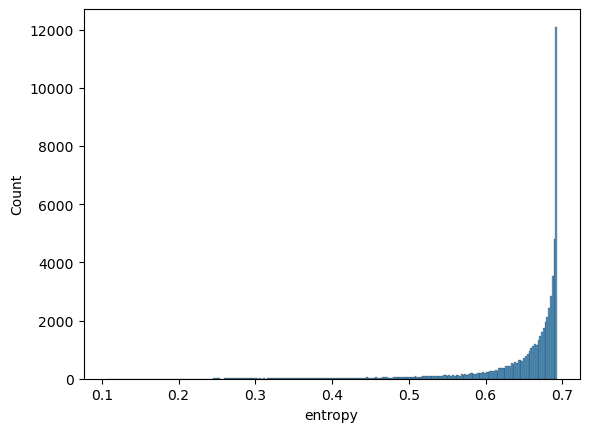

In [99]:
sns.histplot(error_analysis_df['entropy'])

In [97]:
error_analysis_df.groupby('product', observed=True)['entropy'].mean()

product
A    0.654566
B    0.640871
C    0.649277
D    0.653304
E    0.656984
F    0.616795
G    0.587558
H    0.657220
I    0.656101
J    0.654092
Name: entropy, dtype: float64